In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [2]:
import numpy as np
import pandas as pd
from surprise import Dataset, accuracy, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, KNNBasic

In [3]:
df = pd.read_csv("/kaggle/input/the-movies-dataset/ratings_small.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader=reader)

In [6]:
pmf = SVD()
pmf_metrics = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"\n")
print("PMF RMSE: ", pmf_metrics['test_rmse'].mean())
print("PMF MAE: ", pmf_metrics['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9010  0.8882  0.8992  0.8909  0.9032  0.8965  0.0059  
MAE (testset)     0.6921  0.6858  0.6917  0.6880  0.6941  0.6903  0.0030  
Fit time          1.46    1.49    1.45    1.45    1.50    1.47    0.02    
Test time         0.14    0.22    0.13    0.21    0.12    0.16    0.04    


PMF RMSE:  0.8964911786191987
PMF MAE:  0.6903365524594888


In [ ]:
user_cf = KNNBasic(sim_options={'user_based':True})
user_cf_metrics = cross_validate(user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"\n")
print("User CF RMSE: ", user_cf_metrics['test_rmse'].mean())
print("User CF MAE: ", user_cf_metrics['test_mae'].mean())

In [22]:
item_cf = KNNBasic(sim_options={'user_based':False})
item_cf_metrics = cross_validate(item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(f"\n")
print("Item CF RMSE: ", item_cf_metrics['test_rmse'].mean())
print("Item CF MAE: ", item_cf_metrics['test_mae'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9340  0.9398  0.9333  0.9416  0.9227  0.9343  0.0066  
MAE (testset)     0.7203  0.7236  0.7202  0.7265  0.7155  0.7212  0.0037  
Fit time          3.78    3.97    3.95    3.80    3.88    3.87    0.08    
Test time         6.43    6.85    6.71    6.72    6.83    6.71    0.15    


Item CF RMSE:  0.9342787134312303
Item CF MAE:  0.7212059880717743


In [12]:
difference_fn = ["cosine", "MSD", "pearson_baseline"]
user_cf_RMSEs = []
user_cf_MAEs = []

item_cf_RMSEs = []
item_cf_MAEs = []

for fn in difference_fn:
    user_cf = KNNBasic(sim_options={'name':fn, 'user_based':True})
    user_cf_metrics = cross_validate(user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    user_cf_RMSEs.append(user_cf_metrics['test_rmse'].mean())
    user_cf_MAEs.append(user_cf_metrics['test_mae'].mean())

    item_cf = KNNBasic(sim_options={'name':fn, 'user_based':False})
    item_cf_metrics = cross_validate(item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    item_cf_RMSEs.append(item_cf_metrics['test_rmse'].mean())
    item_cf_MAEs.append(item_cf_metrics['test_mae'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [14]:
print(user_cf_RMSEs)
print(user_cf_MAEs)
print(item_cf_RMSEs)
print(item_cf_MAEs)

[0.9931139055269286, 0.9670679184931427, 0.9964558632257594]
[0.7675244059681159, 0.7438430154064195, 0.7698729103049982]
[0.9959356421078553, 0.9333873709588782, 0.9408700214215131]
[0.7748969962349891, 0.7201953528989099, 0.7124994332113932]


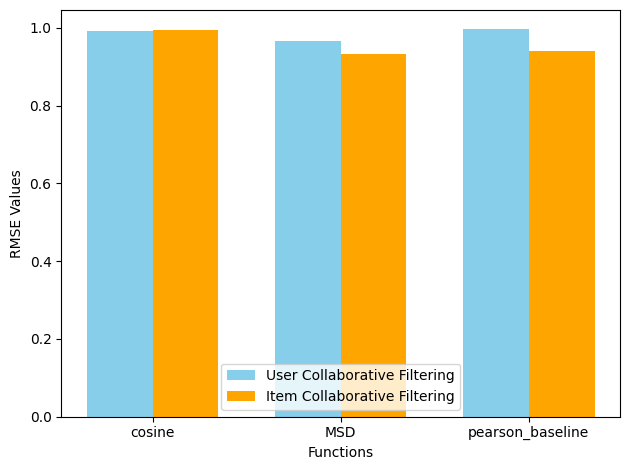

In [18]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.35
x = np.arange(len(difference_fn))

# Plotting
plt.bar(x - bar_width/2, user_cf_RMSEs, width=bar_width, label='User Collaborative Filtering', color='skyblue')
plt.bar(x + bar_width/2, item_cf_RMSEs, width=bar_width, label='Item Collaborative Filtering', color='orange')

plt.xlabel('Functions')
plt.ylabel('RMSE Values')
# plt.title('Clubbed Bar Graph for RMSE')
plt.xticks(ticks=x, labels=difference_fn)
plt.legend()

plt.tight_layout()
plt.show()

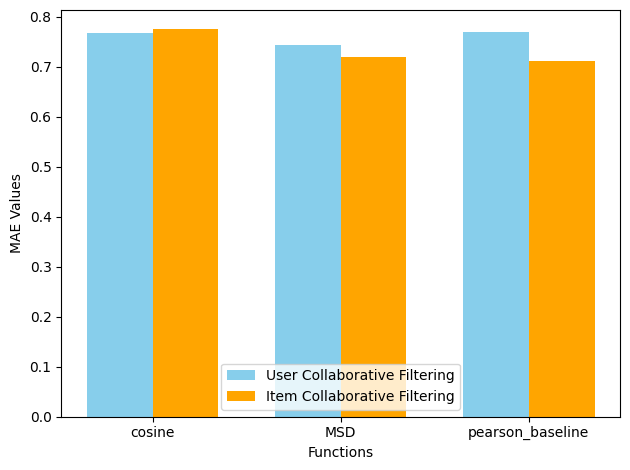

In [19]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.35
x = np.arange(len(difference_fn))

# Plotting
plt.bar(x - bar_width/2, user_cf_MAEs, width=bar_width, label='User Collaborative Filtering', color='skyblue')
plt.bar(x + bar_width/2, item_cf_MAEs, width=bar_width, label='Item Collaborative Filtering', color='orange')

plt.xlabel('Functions')
plt.ylabel('MAE Values')
# plt.title('Clubbed Bar Graph for RMSE')
plt.xticks(ticks=x, labels=difference_fn)
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
best_k_userCF = 0
best_k_itemCF = 0
user_cf_RMSEs = []
user_cf_MAEs = []
item_cf_RMSEs = []
item_cf_MAEs = []

for k in range(1,60):
    print("K =", k)
    user_cf = KNNBasic(k=k, sim_options={'user_based':True})
    user_cf_metrics = cross_validate(user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    user_cf_RMSEs.append(user_cf_metrics['test_rmse'].mean())
    user_cf_MAEs.append(user_cf_metrics['test_mae'].mean())
    if best_k_userCF==0 or user_cf_metrics['test_rmse'].mean() < user_cf_RMSEs[best_k_userCF-1]:
        best_k_userCF = k

    item_cf = KNNBasic(k=k, sim_options={'user_based':False})
    item_cf_metrics = cross_validate(item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    item_cf_RMSEs.append(item_cf_metrics['test_rmse'].mean())
    item_cf_MAEs.append(item_cf_metrics['test_mae'].mean())
    if best_k_itemCF==0 or item_cf_metrics['test_rmse'].mean() < item_cf_RMSEs[best_k_itemCF-1]:
        best_k_itemCF = k

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

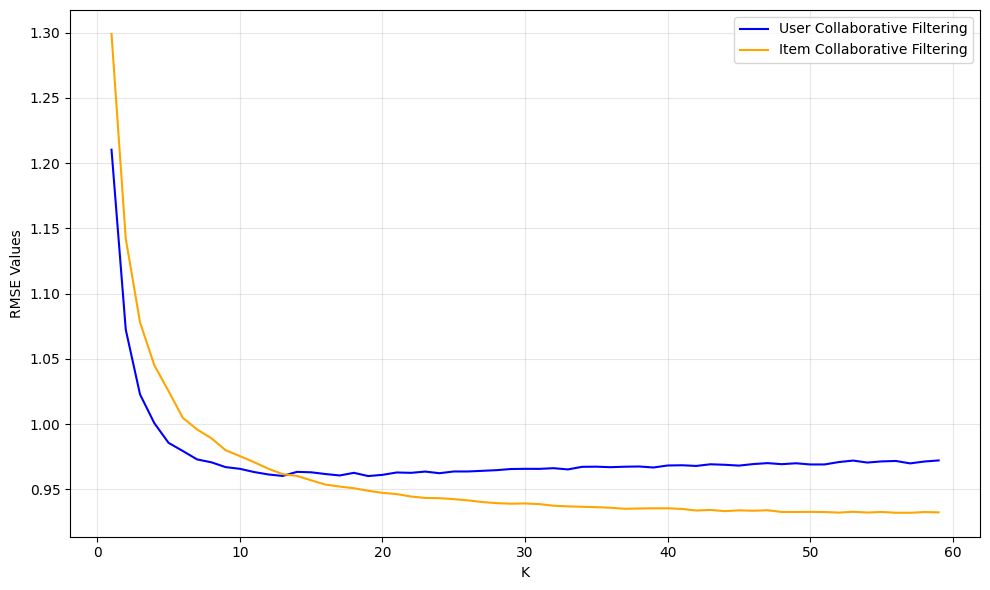

In [25]:
x = np.arange(1, 60)

plt.figure(figsize=(10, 6))
plt.plot(x, user_cf_RMSEs, color='blue', label='User Collaborative Filtering')
plt.plot(x, item_cf_RMSEs, color='orange', label='Item Collaborative Filtering')

plt.xlabel('K')
plt.ylabel('RMSE Values')
# plt.title('Line Chart of RMSE')
plt.grid(alpha=0.3)
plt.legend()

# Display
plt.tight_layout()
plt.show()


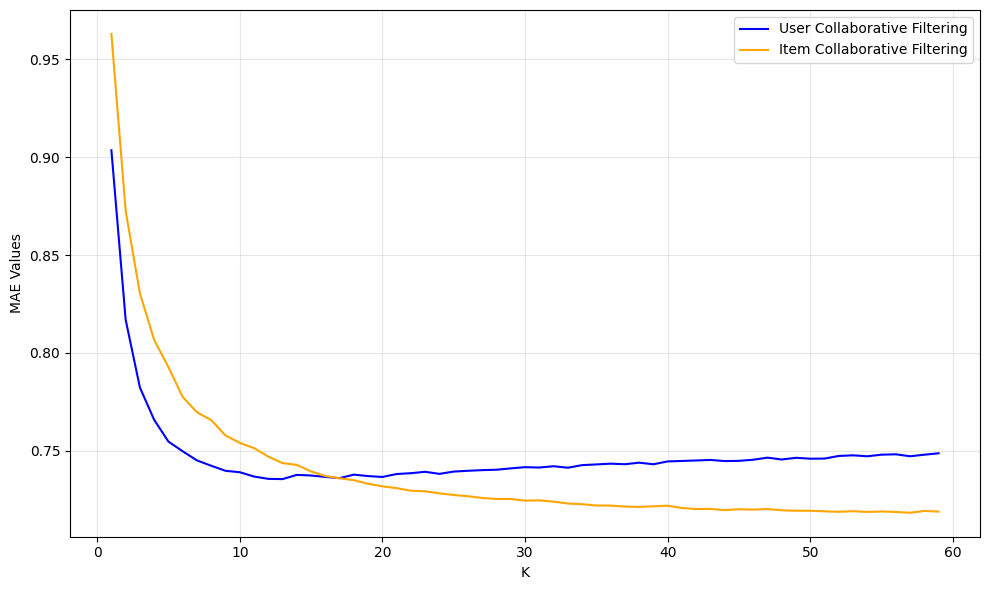

In [26]:
x = np.arange(1, 60)

plt.figure(figsize=(10, 6))
plt.plot(x, user_cf_MAEs, color='blue', label='User Collaborative Filtering')
plt.plot(x, item_cf_MAEs, color='orange', label='Item Collaborative Filtering')

plt.xlabel('K')
plt.ylabel('MAE Values')
# plt.title('Line Chart of RMSE')
plt.grid(alpha=0.3)
plt.legend()

# Display
plt.tight_layout()
plt.show()


In [28]:
print("Best k User-based CF:", best_k_userCF)
print("Best k Item-based CF:", best_k_itemCF)

Best k User-based CF: 19
Best k Item-based CF: 57
